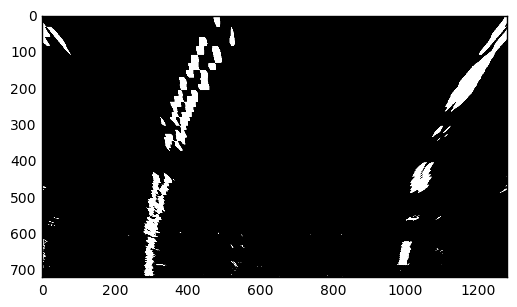

In [1]:
import numpy as np
import cv2
import glob
import utils
import matplotlib.pyplot as plt
from lane_finder import LaneFinder
from moviepy.editor import VideoFileClip
%matplotlib inline

images = glob.glob('./camera_cal/calibration*.jpg')
mtx, dist = utils.calibrate_camera(images)

img = utils.load_image('./test_images/test5.jpg')

lane_finder = LaneFinder(mtx, dist
                        )
warped = lane_finder.create_mask(img)
plt.imshow(warped, cmap='gray')


304 1034


(720, 0)

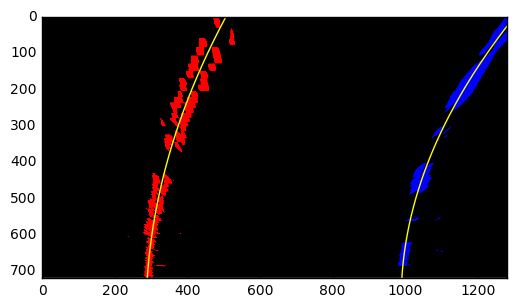

In [2]:
left_center, right_center = lane_finder.get_line_centers(warped)
print(left_center, right_center)

lefty, leftx = lane_finder.get_lane(warped, left_center)
righty, rightx = lane_finder.get_lane(warped, right_center)

left_fit = lane_finder.get_line_coef(leftx, lefty)
right_fit = lane_finder.get_line_coef(rightx, righty)

y = np.linspace(0, warped.shape[0]-1, warped.shape[0] )
left_x = lane_finder.fit_line(left_fit, y)
right_x = lane_finder.fit_line(right_fit, y)

out_img = np.zeros_like(img)
out_img[lefty, leftx] = [255, 0, 0]
out_img[righty, rightx] = [0, 0, 255]

plt.imshow(out_img)
plt.plot(left_x, y, color='yellow')
plt.plot(right_x, y, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

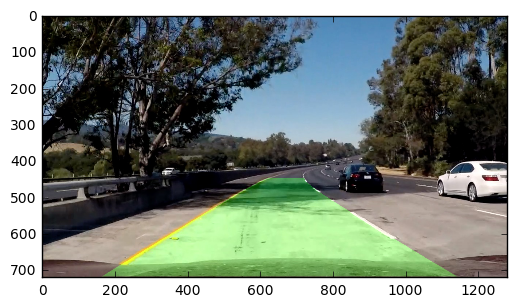

In [3]:
result = lane_finder.project_on_image(img, left_x, right_x, y)
plt.imshow(result)

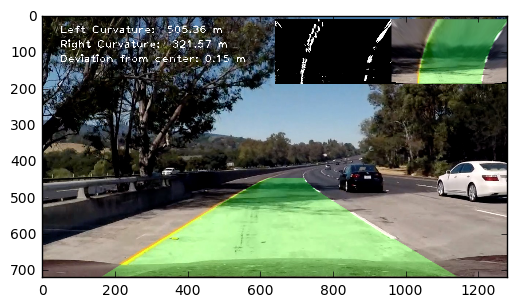

In [4]:
result = lane_finder.process_image(img)
plt.imshow(result)

In [5]:
white_output = './output_images/project_video_output.mp4'
clip1 = VideoFileClip("./project_video.mp4")
white_clip = clip1.fl_image(lane_finder.process_image)
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video ./output_images/project_video_output.mp4
[MoviePy] Writing video ./output_images/project_video_output.mp4


100%|█████████▉| 1260/1261 [02:08<00:00,  9.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./output_images/project_video_output.mp4 

CPU times: user 5min 18s, sys: 4.09 s, total: 5min 22s
Wall time: 2min 9s


In [6]:
from IPython.display import HTML
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [7]:
challenge_output = './output_images/challenge_video_output.mp4'
clip1 = VideoFileClip("./challenge_video.mp4")
white_clip = clip1.fl_image(lane_finder.process_image)
%time white_clip.write_videofile(challenge_output, audio=False)

[MoviePy] >>>> Building video ./output_images/challenge_video_output.mp4
[MoviePy] Writing video ./output_images/challenge_video_output.mp4


100%|██████████| 485/485 [01:02<00:00, 10.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./output_images/challenge_video_output.mp4 

CPU times: user 2min 8s, sys: 2.55 s, total: 2min 10s
Wall time: 1min 2s


In [8]:
from IPython.display import HTML
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))